In [546]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv('/kaggle/input/playground-series-s5e11/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s5e11/test.csv')
sub = pd.read_csv('/kaggle/input/playground-series-s5e11/sample_submission.csv')


# 1. UNDERSTANDING THE DATA

In [547]:
train.head(3)

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0


In [548]:
train.shape

(593994, 13)

In [549]:
train.isnull().sum()

id                      0
annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
loan_paid_back          0
dtype: int64

In [550]:
test.isnull().sum()

id                      0
annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
dtype: int64

In [551]:
train.columns

Index(['id', 'annual_income', 'debt_to_income_ratio', 'credit_score',
       'loan_amount', 'interest_rate', 'gender', 'marital_status',
       'education_level', 'employment_status', 'loan_purpose',
       'grade_subgrade', 'loan_paid_back'],
      dtype='object')

In [552]:
numerical_col = ['annual_income', 'debt_to_income_ratio', 'credit_score',
       'loan_amount', 'interest_rate']
categorical_col = ['gender', 'marital_status',
       'education_level', 'employment_status', 'loan_purpose',
       'grade_subgrade']

# 2. EDA

In [553]:
train['loan_paid_back'].value_counts()

# A lot of 1's than 0's which can cause our dataset to be bias towards 1's


loan_paid_back
1.0    474494
0.0    119500
Name: count, dtype: int64

In [554]:
((train['loan_paid_back']==1).sum())*100 / len(train['loan_paid_back'])
# 80 % of the data is 1.

79.88195166954549

## 1. Univariate Analysis



### Numerical Features

In [555]:
train.describe()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back
count,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000
mean,296996.500000,48212.202976,0.120696,680.916009,15020.297629,12.356345,0.798820
std,171471.442235,26711.942078,0.068573,55.424956,6926.530568,2.008959,0.400883
min,0.000000,6002.430000,0.011000,395.000000,500.090000,3.200000,0.000000
25%,148498.250000,27934.400000,0.072000,646.000000,10279.620000,10.990000,1.000000
50%,296996.500000,46557.680000,0.096000,682.000000,15000.220000,12.370000,1.000000
75%,445494.750000,60981.320000,0.156000,719.000000,18858.580000,13.680000,1.000000
max,593993.000000,393381.740000,0.627000,849.000000,48959.950000,20.990000,1.000000


### a. Are there outliers or weird values?

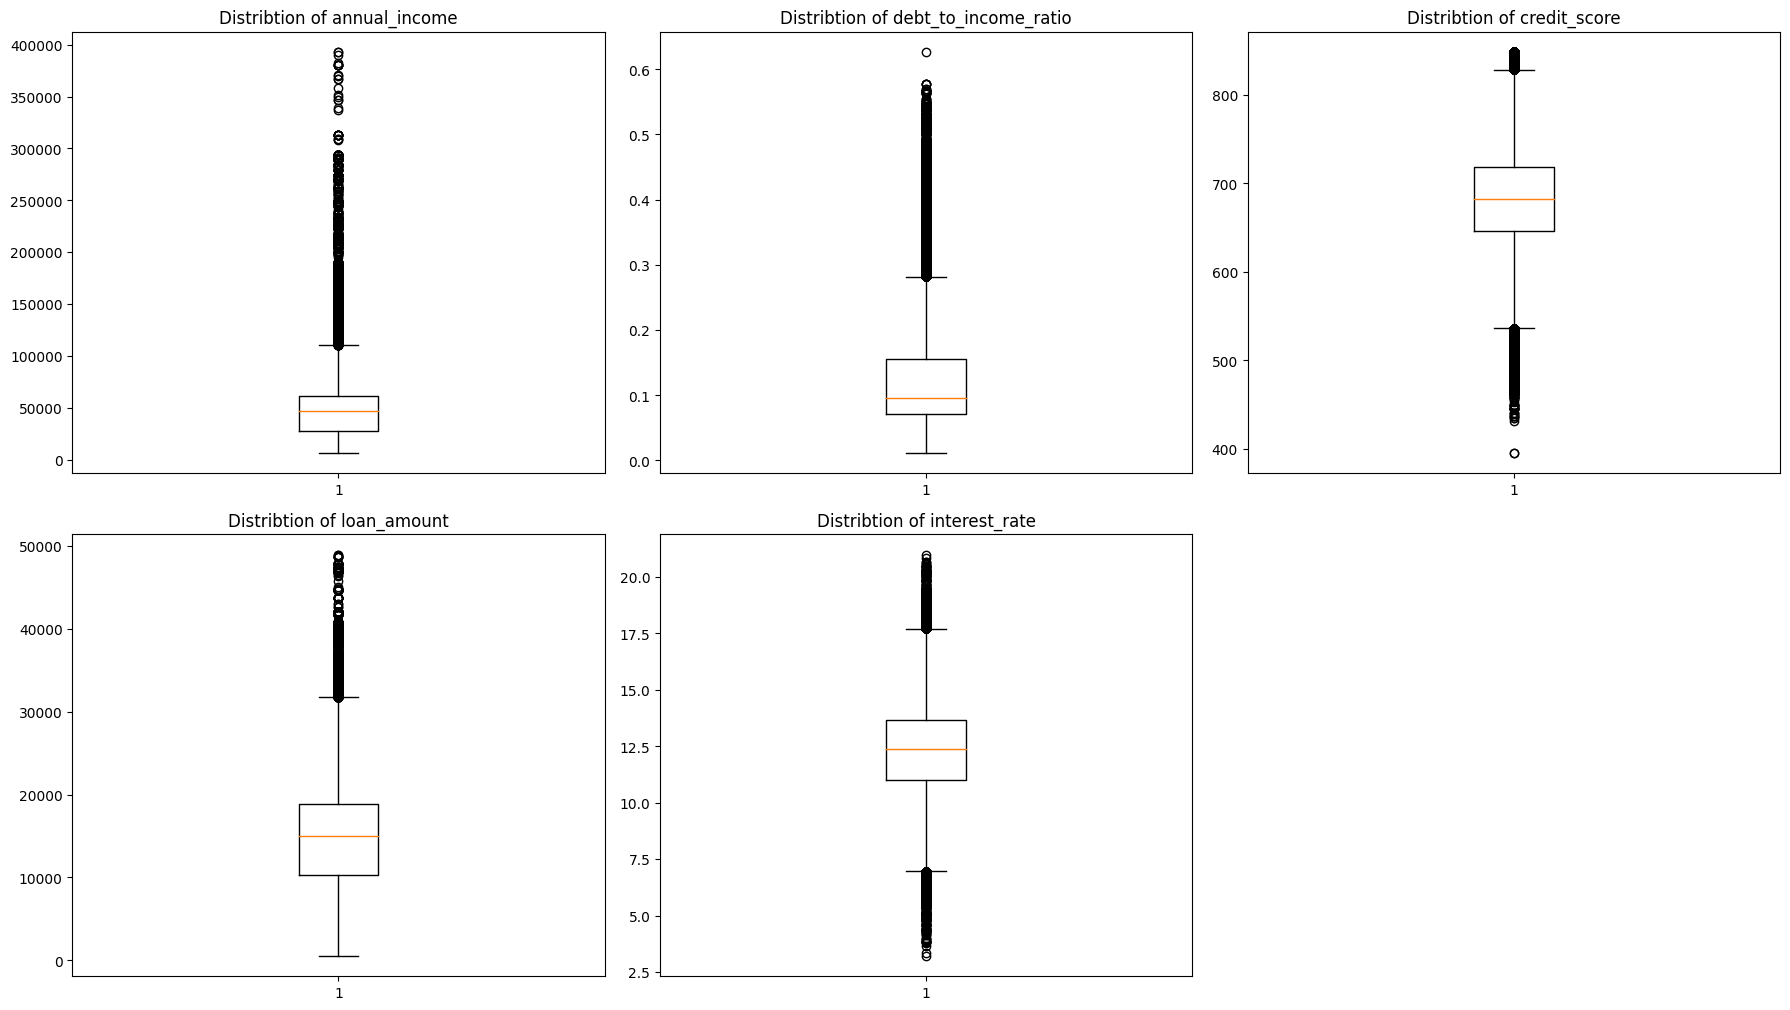

In [556]:
plt.figure(figsize = (18,len(numerical_col)+10))
for i,col in enumerate(numerical_col):
    plt.subplot(len(numerical_col)//2 +1, 3,i+1)
    plt.boxplot(col,data = train)
    plt.title(f"Distribtion of {col}")
    plt.tight_layout()

Interpretation:
- Annual Income and Loan Amount Like they have some extreme values.

### b. What does the Distribution Look Like?

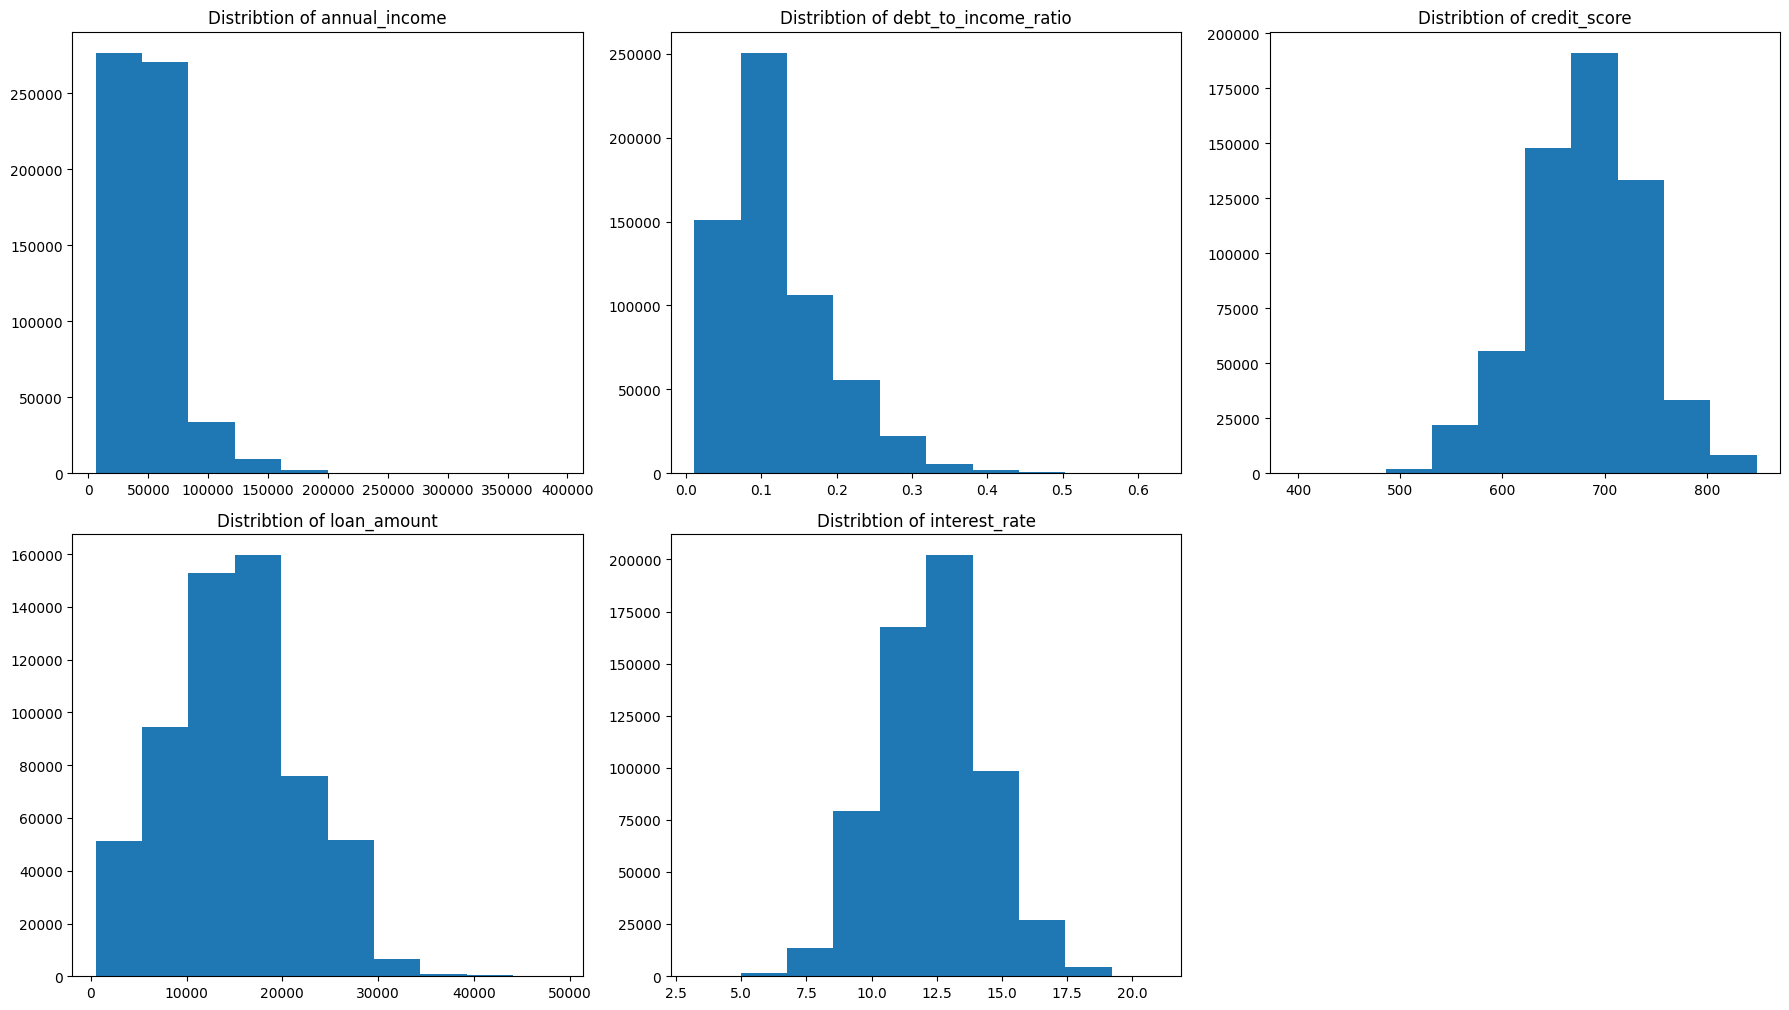

In [557]:
plt.figure(figsize = (18,len(numerical_col)+10))
for i,col in enumerate(numerical_col):
    plt.subplot(len(numerical_col)//2 +1, 3,i+1)
    plt.hist(col,data = train)
    plt.title(f"Distribtion of {col}")
    plt.tight_layout()

#### Interpretations:
- Annual Income:
  - Top 1-2 % are High Income earners
  - Heavy Right skew
  - Would have to consider Log_transform if using linear Models or KNN
- Debt to Income:
  - High Debt to Income Indicates High debt or Low Income or Both
  - These fall under High risk borrowers and and DI greater than 0.3 is risky.DTI is a strong risk indicator, and the tail is meaningful signal
- Credit Score:
  - Almost Bell shaped
  - Should be in the Top 3 of our predicters
- Interest Rate:
  - Higher Interest Rate should Correlate either with Low Income or high Debt or Bad Credit Score

### Categorical Features

In [558]:
for col in categorical_col:
    print(col)
    print(train[col].value_counts())
    print("------")


gender
gender
Female    306175
Male      284091
Other       3728
Name: count, dtype: int64
------
marital_status
marital_status
Single      288843
Married     277239
Divorced     21312
Widowed       6600
Name: count, dtype: int64
------
education_level
education_level
Bachelor's     279606
High School    183592
Master's        93097
Other           26677
PhD             11022
Name: count, dtype: int64
------
employment_status
employment_status
Employed         450645
Unemployed        62485
Self-employed     52480
Retired           16453
Student           11931
Name: count, dtype: int64
------
loan_purpose
loan_purpose
Debt consolidation    324695
Other                  63874
Car                    58108
Home                   44118
Education              36641
Business               35303
Medical                22806
Vacation                8449
Name: count, dtype: int64
------
grade_subgrade
grade_subgrade
C3    58695
C4    55957
C2    54443
C1    53363
C5    53317
D1    37029
D3    

Interpretations:
- Loan Purpose:
   - Can Merge Vacation Into Others as Data is Less
   - For this and all other, we could use One Hot encoding
- Grade Subgrade:
   - This feature has around 30 unique values and It has an Ordinal Nature
   - A < B < C < D < E < F : Within each grade, subgrade 1 is better than 5.
   - Will have to use Oridnal Encoding rather than One Hot encoding

## 2. Bivariate Analysis
This is done to see which feature has a higher predictive Power


### Numerical Features
Before I Move to the analysis, I would like to make few hypothesis about how the data should look like, this could then show wether the feature can be used as a strong predicter for Loan Repayment.

**1. annual_income vs loan Repayment**

***Borrowers who did NOT pay back should have slightly lower incomes.***

Expected:
- More borrowers in low-income range (20k–40k)
- Less presence in high-income brackets

To Check:

- Lower median
- Is the distribution for defaulters more tight + left-shifted?

---

**2. debt_to_income_ratio vs loan Repayment**

Expected:

- Defaulters should have much higher DTI.
- Their distribution will shift to the right.
- The tail (0.25–0.6) will be dominated by defaulters.

To Check:
- Is the median DTI higher for Defaulters
- Are the high-DTI values mostly defaulters?
- Does the KDE for defaulters stretch further right?

---
**3. credit score vs loan Repayment**

Expected:

- Borrowers who default have lower scores.

To Check

- The KDE plot for defaulters should peak around 600–630.
- Repaid loans peak around 680–710.

---
4.  Loan Amount vs Loan Repayment

Not that crazy of a feature individually. 

Expected:

- Defaulters may take slightly larger Loans ( Not sure about this though )

---

5. Interest Rate vs Loan Repayment

Higher Interest Rate suggest that More Risk Is involved. More Risk says either Huge Loan is Take or Bad Credit Score or Low Annual Income or a combination of all

Expected:

- Defaulters have higher interest Rate on Average

To Check:

- Median interest rate for defaulters should be higher (~14%+)
- KDE curve for defaulters should shift to the right.


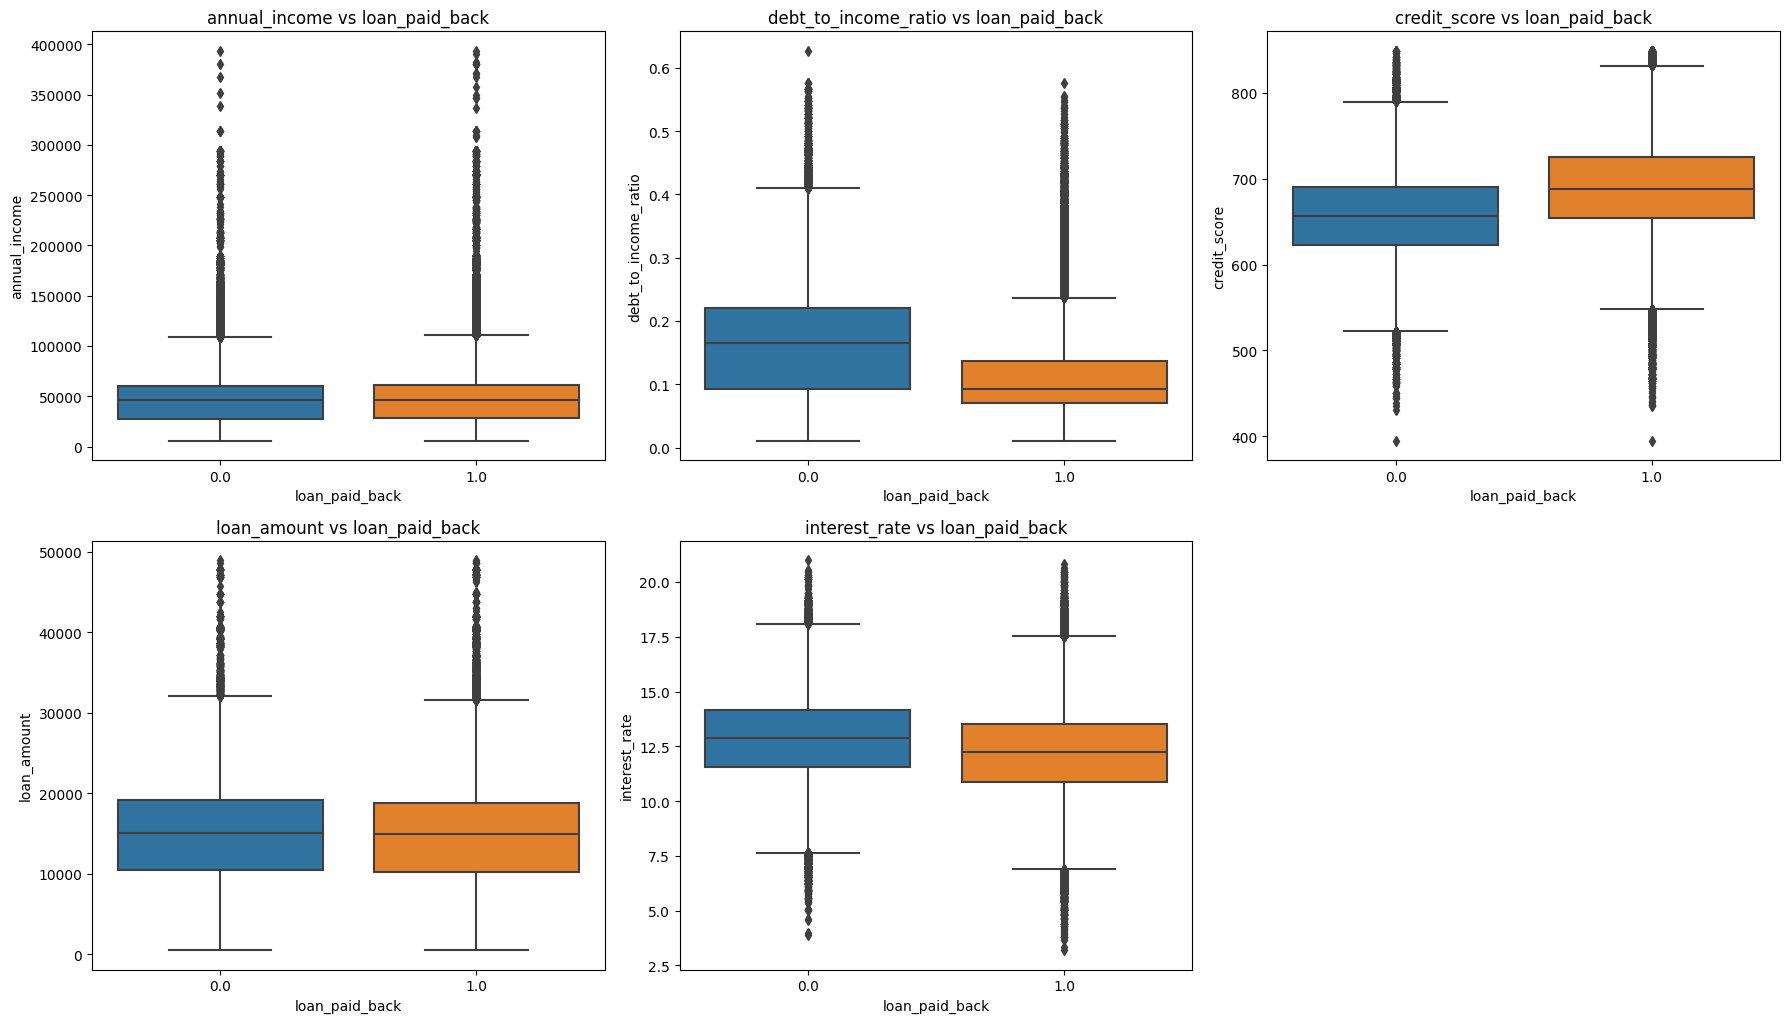

In [559]:
import seaborn as sns
import matplotlib.pyplot as plt
LABEL = "loan_paid_back"
plt.figure(figsize = (18,len(numerical_col)+10))
for i,col in enumerate(numerical_col):
    plt.subplot(len(numerical_col)//2 +1, 3, i+1)
    sns.boxplot(x= LABEL,y = col, data = train)
    plt.title(f"{col} vs {LABEL}")
    plt.tight_layout()

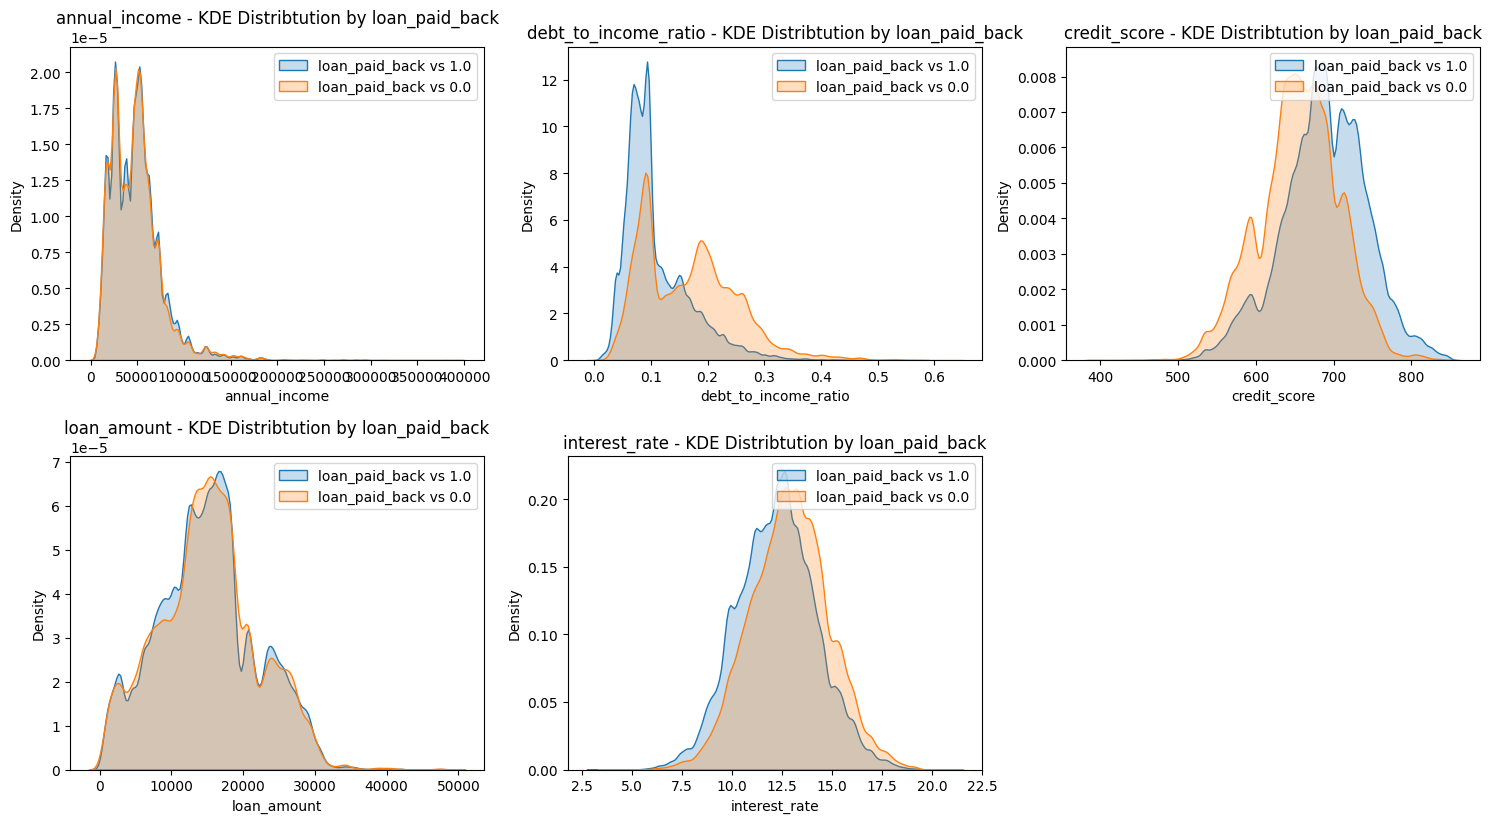

In [560]:
import warnings
warnings.filterwarnings("ignore")
n_cols = 3
n_rows = len(numerical_col)//2 +1
plt.figure(figsize = (5*n_cols,4*n_rows))
for i,col in enumerate(numerical_col,1):
    plt.subplot(n_cols,n_rows,i)
    for label in train[LABEL].unique():
        subset = train[train[LABEL]==label]
        sns.kdeplot(subset[col],label = f"{LABEL} vs {label}",fill = True)
    plt.title(f"{col} - KDE Distribtution by {LABEL}")
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()

### Conclusion of Hypothesis:

> **Annual Income**
- Repayer's have slightly ( very less ) more median income
- Defaulter's and Non Defaulter's Both have a Right skewed Data
- Kde Plot of Annual Income almost Overlap's - NOT A VERY STRONG PREDICTOR
Hypothesis not Validated

> **Debt to Income**
- Defaulter's Have a Higher median DTI and Long Tail dominated by Defaulter's.
- Clear and powerful separation:
    - Repayers peak at 0.08–0.12
    - Defaulters peak at 0.15–0.23
    - Defaulters have large density beyond 0.25 and 0.30
Hypothesis Validated : DTI is one of the strongest predictors

> **Credit Score**
- Defaulter's having lower Median Score and a good seperation in their Kde Plots.
Hypothesis Validated: Credit Score can be one of the strongest Predictors.

> **Loan Amount**
- Both the medians and kde plots are very similar and there is no Proper Distinction.
Hypothesis Validated: Not a very strong indicator Individually

> ** Interest Rate**
- Interest Rate for Borrower's are generally higher and okayish Disctinction between the two kde Plots
Hypothesis validated: Interest Rate - strong Predictor

By this analysis, we can conclude that, " Debit to Income ", " Credit Score " and " Interest Rate " are the Top 3 predictor's. While predicting the model we will try to test it out.


    








### Categorical Features2

Hypothesis:

- Gender:
  - There should be No significant difference in Default rates across gender

- Martial_status:
  - Married Borrowers could have lower defaultee's
  - Divorced borrowers could have higher defaultee's

- Education Level:
  - Higher Education should have lower Default Rates than lower education
  - Expected order (best → worst risk):
    - PhD
    - Master’s
    - Bachelor’s
    - High School
    - Other

- employment_status:
  - Default risk ranking might be
    - Lowest risk → Employed, Retired
    - Moderate risk → Self-employed
    - High risk → Unemployed
    - Very high risk → Students (low income, high instability)

- Loan Purpose:
  - Business loans → higher default (risky cash flows)
  - Medical loans → higher default (financial shock)
  - Vacation loans → higher default (discretionary, lower borrower discipline)
  - Debt consolidation → moderate risk (depends on borrower behavior)
  - Car/Home loans → lowest risk

- Grade subgrade
  - Hypothesis: This is the MOST predictive categorical feature.
Expected:
- Lower grades (A) → low default
- Higher grades (F) → high default
- Subgrades follow order: 1 < 2 < 3 < 4 < 5
- Ranking (best → worst):
A → B → C → D → E → F
















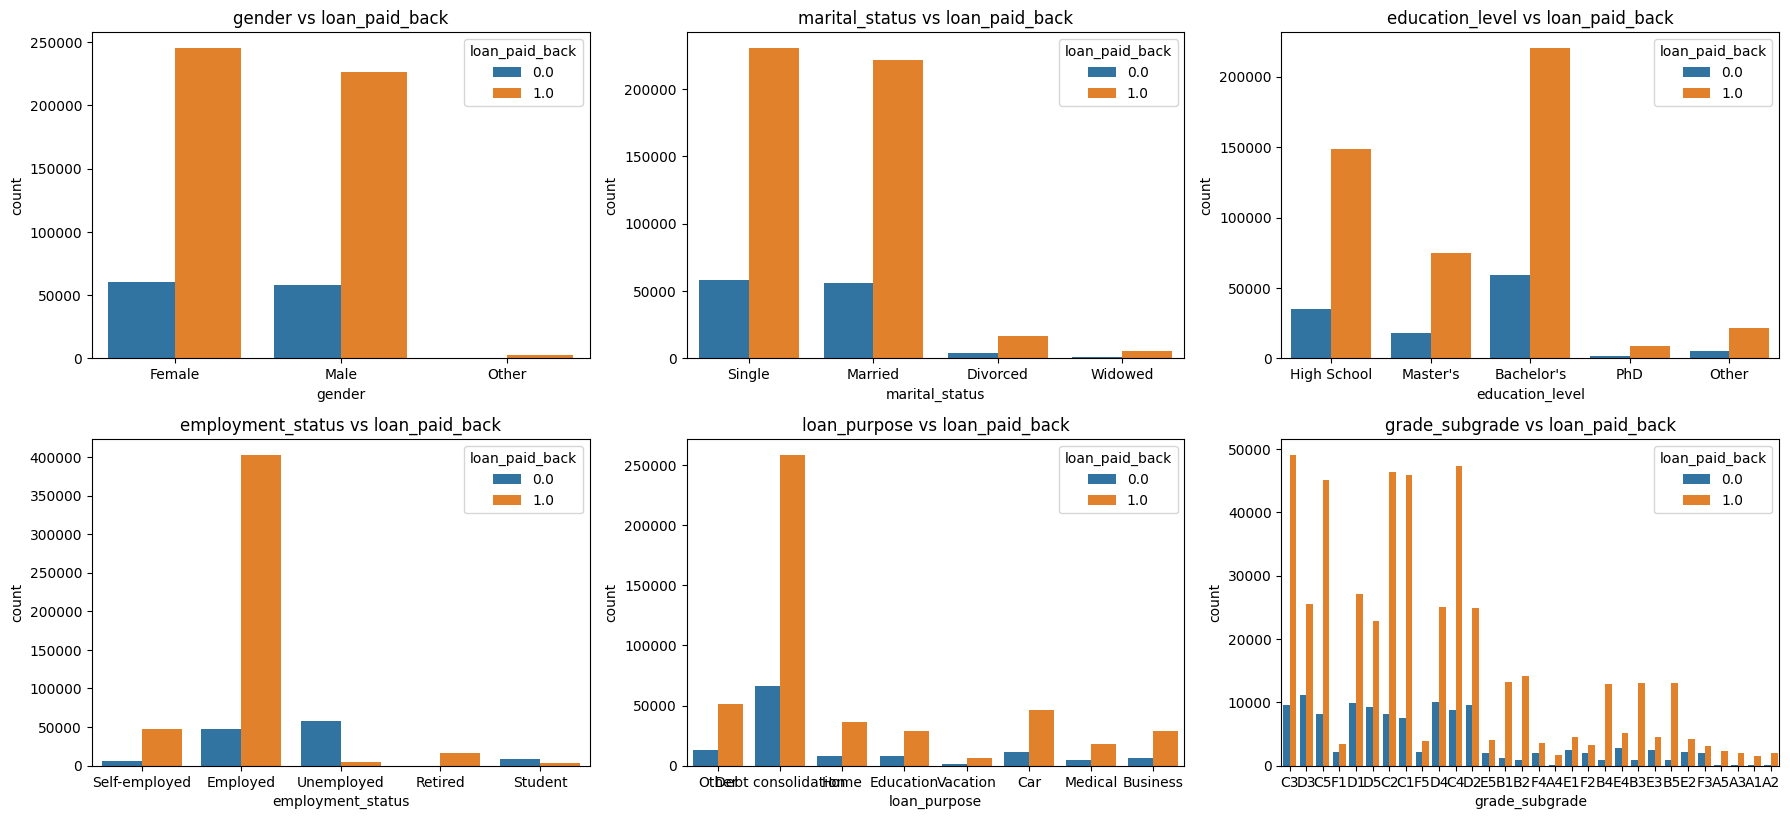

In [561]:
# Relation ship of the categorical column's to the Loan Repayment
import seaborn as sns
import matplotlib.pyplot as plt
LABEL = "loan_paid_back"
plt.figure(figsize = (18,len(categorical_col)+10))
for i,col in enumerate(categorical_col):
    plt.subplot(len(categorical_col)//2 +1, 3, i+1)
    sns.countplot(x= col, hue = LABEL, data = train)
    plt.title(f"{col} vs {LABEL}")
    plt.tight_layout()

Interpretations

1. gender vs loan_paid_back
Observation:
- Male and Female have almost identical bars for paid_back vs not_paid.
- “Other” category is too small to be meaningful.
Matches Hypothesis?
- YES — gender has no predictive power.
Insight:
- Gender should not be an important feature.
- almost zero importance in model.

2. marital_status vs loan_paid_back
Observation:
- Married has slightly fewer defaults compared to Single.
- Divorced and Widowed show slightly higher default proportions.
Matches Hypothesis?
YES — Married borrowers repay slightly more; Divorced/Widowed riskier.
Insight:
- Weak-to-moderate signal.
- Will add a little value to the model but not much.

3. education_level vs loan_paid_back
Observation:
- Higher education (Master’s, PhD) have slightly fewer defaults.
- High School has slightly more defaults.
- Bachelor's is in the middle.
Matches Hypothesis?
- YES — higher education = slightly safer borrowers.
Insight:
- Weak-to-moderate predictive power.
- Useful but not a top feature.

4. employment_status vs loan_paid_back
Observation:
- Employed = lowest default rates.
- Unemployed has noticeably higher defaults.
- Students show higher default ratios.
- Self-employed slightly riskier than employed.
Matches Hypothesis?
- YES — very consistent with expectations.
Insight:
- Employment status has moderate predictive strength.
- Good feature to keep.

5. loan_purpose vs loan_paid_back
Observation:
- Debt consolidation, Home, Car have relatively better repayment.
- Medical, Business, Vacation show visibly higher default proportions.
- “Other” is mixed, but not unusually risky.
Matches Hypothesis?
- YES — medical, business, vacation loans = riskier.
Insight:
- Good predictor.
- Clear differences between categories → useful signal for model.

6. grade_subgrade vs loan_paid_back — the strongest categorical feature
Observation:
- For every grade (A to F) and subgrade (1 to 5):
- Higher subgrades show much higher repayment failure.
- The bars for defaulters increase massively from A → F.

Matches Hypothesis?
- YES — EXACT match. This is the strongest predictor.

Insight:

This feature already encodes credit risk.

Must be encoded ordinally (A1 < A2 < ... < F5).

Should be one of the top 3 most important features in the entire dataset.


---

#### Big EDA Summary (Numerical + Categorical)

Combining everything so far:

- Top Predictors (based on EDA)
  - grade_subgrade
  - credit_score
  - debt_to_income_ratio
  - interest_rate
- Good predictors:
  - employment_status
  - loan_purpose
  - education_level
- Weak predictors:
  - annual_income
  - loan_amount
  - marital_status
- Minimal / No predictive value:
  - gender

## 3. Multivariate Analysis

In [562]:
train.columns

Index(['id', 'annual_income', 'debt_to_income_ratio', 'credit_score',
       'loan_amount', 'interest_rate', 'gender', 'marital_status',
       'education_level', 'employment_status', 'loan_purpose',
       'grade_subgrade', 'loan_paid_back'],
      dtype='object')

In [563]:
numerical_col_2 = ['loan_paid_back', 'annual_income', 'debt_to_income_ratio', 'credit_score',
       'loan_amount', 'interest_rate']
correlation_matrix = train[numerical_col_2].corr()
correlation_matrix

,loan_paid_back,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate
loan_paid_back,1.000000,0.006326,-0.335680,0.234560,-0.003762,-0.131184
annual_income,0.006326,1.000000,0.000553,0.001509,-0.003407,-0.002507
debt_to_income_ratio,-0.335680,0.000553,1.000000,-0.061617,-0.008236,0.030316
credit_score,0.234560,0.001509,-0.061617,1.000000,-0.005761,-0.538335
loan_amount,-0.003762,-0.003407,-0.008236,-0.005761,1.000000,-0.001174
interest_rate,-0.131184,-0.002507,0.030316,-0.538335,-0.001174,1.000000


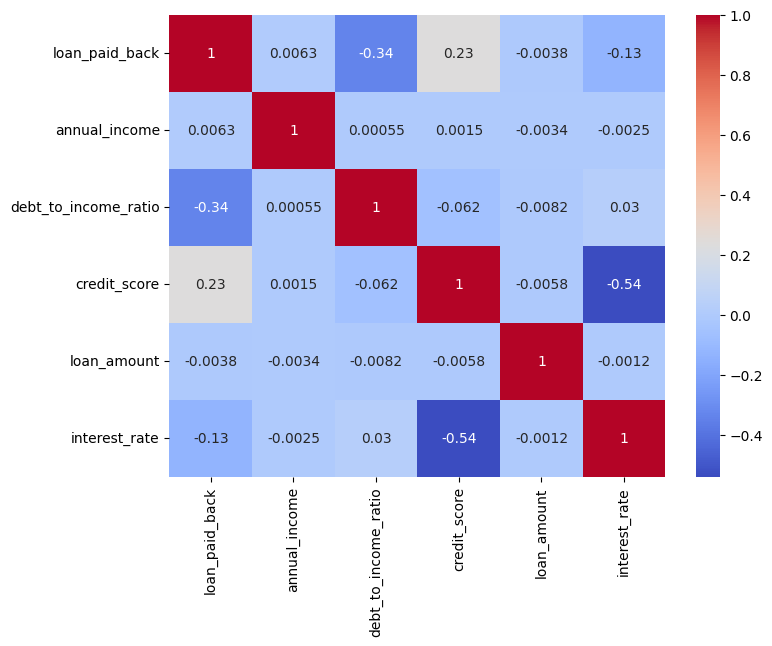

In [564]:
plt.figure(figsize = (8,6))
sns.heatmap(correlation_matrix,annot = True,cmap = 'coolwarm')
plt.show()

| Feature                  | Correlation | Strength  | Interpretation                                    |
| ------------------------ | ----------- | --------- | ------------------------------------------------- |
| **credit_score**         | **+0.23**   | Strong    | Higher credit score → more likely to repay        |
| **debt_to_income_ratio** | **–0.34**   | Strongest | Higher DTI → significantly more likely to default |
| **interest_rate**        | **–0.13**   | Medium    | Higher interest rate correlates with default      |
| annual_income            | +0.006      | None      | No effect                                         |
| loan_amount              | –0.004      | None      | No effect                                         |


# 3. Feature Engineering


In [565]:

train['dataset'] = 'train'
test['dataset']  = 'test'
test['loan_paid_back'] = -1
# train = train.drop('loan_paid_back',axis = 1)
df = pd.concat([train,test],axis = 0).reset_index(drop = True)
df.drop('id',axis = 1,inplace = True)
df.shape

(848563, 13)

## 1. Transforming Existing Numerical Features

### 1.1 Log Transform Annual Income

In [566]:
import numpy as np
non_ensemble_df = df.copy()
# Creating 2 so as to see the power of transformation
non_ensemble_df['annual_income'] = np.log(non_ensemble_df['annual_income'])

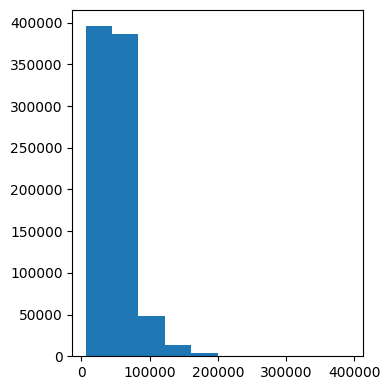

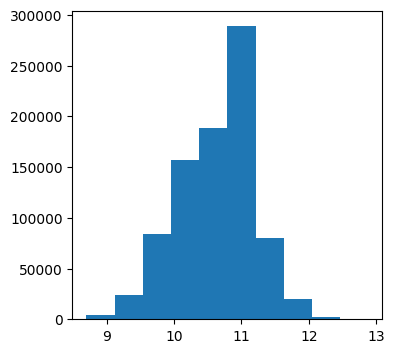

In [567]:
# Before
plt.figure(figsize=(4,4))
plt.hist('annual_income', data = df)
plt.tight_layout()
#After
plt.figure(figsize=(4,4))
plt.hist('annual_income', data = non_ensemble_df)
plt.show()

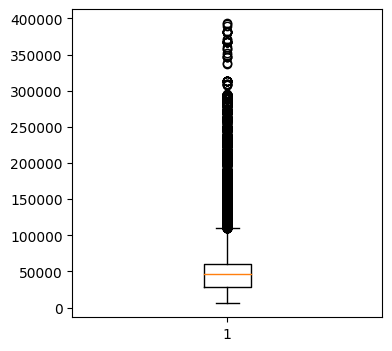

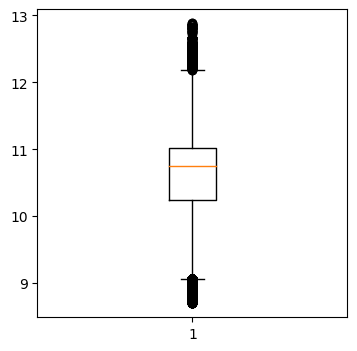

In [568]:
plt.figure(figsize = (4,4))
plt.boxplot('annual_income',data = df)
plt.show()
plt.figure(figsize = (4,4))
plt.boxplot('annual_income',data = non_ensemble_df)
plt.show()

### 1.2 Capping DTI

In [569]:
non_ensemble_df.shape

(848563, 13)

In [570]:
from scipy import stats
# Removing outliers outside of 3 standard deviations.


non_ensemble_df['zscore_dti'] = stats.zscore(non_ensemble_df['debt_to_income_ratio'])
non_ensemble_df = non_ensemble_df[(non_ensemble_df['zscore_dti'] >= -3) & (non_ensemble_df['zscore_dti'] <= 3)]
non_ensemble_df.shape

(838059, 14)

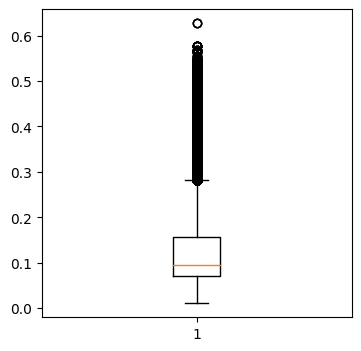

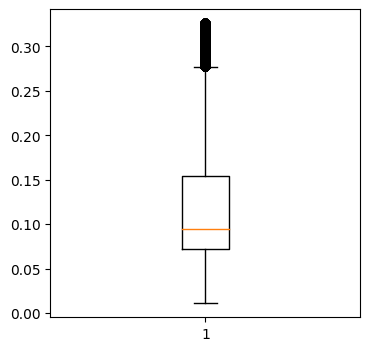

In [571]:
plt.figure(figsize = (4,4))
plt.boxplot('debt_to_income_ratio',data = df)
plt.show()
plt.figure(figsize = (4,4))
plt.boxplot('debt_to_income_ratio',data = non_ensemble_df)
plt.show()

In [572]:
# ig we need to drop the z-score cuz it doesnt really matter now
non_ensemble_df.drop(columns = 'zscore_dti',inplace = True)

## 2. Creating New high impact numerical Features

### 2.1 Loan to Income

In [573]:
df['loan_to_income_ratio'] = df['loan_amount'] / df['annual_income']
non_ensemble_df['loan_to_income_ratio'] = non_ensemble_df['loan_amount'] / non_ensemble_df['annual_income']
# Isn't debit to income the same as loan amount to annual income? - ig not

### 2.2 Total Loan Repayment
The formula is basically $$ P*(1+r)^n $$
Since we haven't gotten tenure over here, we will just keep $$ P*(1+r) $$

Interest Rate is given in Percentages


In [574]:
df['Loan_Burden'] = df['loan_amount'] + df['loan_amount']*(1+(df['interest_rate'])/100)
non_ensemble_df['Loan_Burden'] = non_ensemble_df['loan_amount'] + non_ensemble_df['loan_amount']*(1+(non_ensemble_df['interest_rate'])/100)


### 2.3 Credit Score vs DTI

High Debt to income mean's it is very risky and high risk tends to Lower Credit score, these both should be inversely proportional but the correlation matrix only gave a score of around 0. So let's try to build a better feature including these two:

$$ interation = credit score / (1 + DTI ) $$

In [575]:
df['cs_dti_interaction'] = df['credit_score'] / (1+df['debt_to_income_ratio'])
non_ensemble_df['cs_dti_interaction'] = non_ensemble_df['credit_score'] / (1+non_ensemble_df['debt_to_income_ratio'])

### Let's Check

The Improvement in correlation over the numerical features

In [576]:
df.columns

Index(['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount',
       'interest_rate', 'gender', 'marital_status', 'education_level',
       'employment_status', 'loan_purpose', 'grade_subgrade', 'loan_paid_back',
       'dataset', 'loan_to_income_ratio', 'Loan_Burden', 'cs_dti_interaction'],
      dtype='object')

<Axes: >

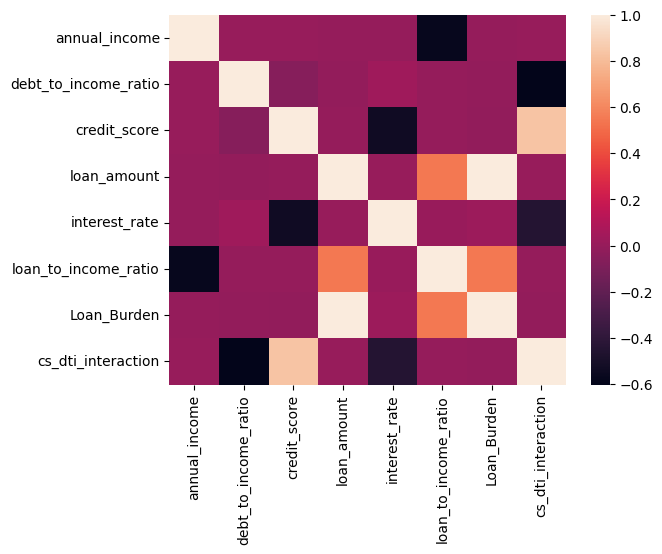

In [577]:
new_numerical_cols = ['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount',
       'interest_rate','loan_to_income_ratio', 'Loan_Burden', 'cs_dti_interaction']
newcorelation = df[new_numerical_cols].corr()
sns.heatmap(newcorelation)

## 3. Encoding Categorical Features

### 3.1 Ordinal Encoding Grade Subgrade


In [578]:
encoded_map = {'A1':1,'A2':2,'A3':3,'A4':4,'A5':5,
               'B1':6,'B2':7,'B3':8,'B4':9,'B5':10,
               'C1':11,'C2':12,'C3':13,'C4':14,'C5':15,
               'D1':16,'D2':17,'D3':18,'D4':19,'D5':20,
               'E1':21,'E2':22,'E3':23,'E4':24,'E5':25,
               'F1':26,'F2':27,'F3':28,'F4':29,'F5':30
              }
df['Encoded_grade_subgrade'] = df['grade_subgrade'].map(encoded_map)
non_ensemble_df['Encoded_grade_subgrade'] = non_ensemble_df['grade_subgrade'].map(encoded_map)

In [580]:
# Dropping the grade_subgrade 
df = df.drop(columns = 'grade_subgrade',axis = 1)
non_ensemble_df = non_ensemble_df.drop(columns = 'grade_subgrade',axis = 1)

### 3.2 One Hot Encoding Other categorical features

In [582]:
newcategorical_cols = ['gender', 'marital_status', 'education_level',
       'employment_status', 'loan_purpose']
df = pd.get_dummies(df,columns = newcategorical_cols,drop_first = True,dtype = float)
non_ensemble_df = pd.get_dummies(non_ensemble_df,columns = newcategorical_cols,drop_first = True,dtype = float)

# 4. Baseline Models

i'll first separate out the dataframes and then cook.

In [585]:
# Train 2 is without transformation for ensemble methods
train2 = df[df['dataset']=='train'].drop('dataset',axis = 1)
test2 = df[df['dataset']=='test'].drop(['dataset','loan_paid_back'],axis = 1)

In [586]:
# Train 3 is with transformation for non-ensemble methods
train3 = non_ensemble_df[non_ensemble_df['dataset']=='train'].drop('dataset',axis = 1)
test3= non_ensemble_df[non_ensemble_df['dataset']=='test'].drop(['dataset','loan_paid_back'],axis = 1)
train3.shape

(586697, 30)

In [587]:
# 2 is for tree based algorithms.
from sklearn.model_selection import train_test_split
y2 = train2['loan_paid_back'].values
X2 = train2.drop('loan_paid_back',axis = 1).values
x2_train,x2_val,y2_train,y2_val = train_test_split(X2,y2,test_size=0.2, random_state=42, stratify=y2)


In [600]:
# 3 is for Distance Based ALgorithms
y3 = train3['loan_paid_back'].values
X3 = train3.drop('loan_paid_back',axis = 1).values
x3_train,x3_val,y3_train,y3_val = train_test_split(X3,y3,test_size=0.2, random_state=42,stratify=y3)


In [601]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Scaling Important for Distance Based Algorithms
x3_train_scaled = scaler.fit_transform(x3_train)
x3_val_scaled = scaler.transform(x3_val)

## 4.1 Logistic Regression


### 4.1.1 Logistic Regression from Ground up

In [602]:
class MyLogisticRegression(object):
    def __init__(self,learning_rate = 0.1,epochs = 1000):
        self.weights = None
        self.bias = None
        self.learning_rate = learning_rate
        self.epochs = epochs
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    def fit(self,x,y):
        n_samples,n_features = x.shape
        self.weights = np.zeros(n_features)
        self.bias = 0.0
        for i in range(self.epochs):
            linear = np.dot(x,self.weights) + self.bias
            y_pred = self.sigmoid(linear)
            dw = (1/n_samples)*np.dot(x.T,(y_pred - y))
            db = (1/n_samples)*np.sum(y_pred-y)
            self.weights = self.weights - self.learning_rate*dw
            self.bias = self.bias -self.learning_rate*db
    def predict_in_probability(self,x):
        linear = np.dot(x,self.weights)+self.bias
        return self.sigmoid(linear)
    def predict(self,x,threshold = 0.5):
        probability = self.predict_in_probability(x)
        return (probability >= threshold).astype(int)

In [603]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)
my_lr = MyLogisticRegression()
my_lr.fit(x3_train_scaled,y3_train)
my_y3_pred = my_lr.predict(x3_val_scaled)

In [607]:
my_acc  = accuracy_score(my_y3_pred,y3_val)
my_prec = precision_score(my_y3_pred,y3_val)
my_rec  = recall_score(my_y3_pred,y3_val)
my_f1   = f1_score(my_y3_pred,y3_val)
my_auc  = roc_auc_score(y3_pred,y3_val)

print(f"Scratch Logistic Regression:")
print(f"  Accuracy : {my_acc:.4f}")
print(f"  Precision: {my_prec:.4f}")
print(f"  Recall   : {my_rec:.4f}")
print(f"  F1-score : {my_f1:.4f}")
print(f"  ROC-AUC  : {my_auc:.4f}")

Scratch Logistic Regression:
  Accuracy : 0.9033
  Precision: 0.9751
  Recall   : 0.9109
  F1-score : 0.9419
  ROC-AUC  : 0.8837


### 4.1.2 Logistic Regression using Library

In [606]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x3_train_scaled,y3_train)
y3_pred = my_lr.predict(x3_val_scaled)

acc  = accuracy_score(y3_pred,y3_val)
prec = precision_score(y3_pred,y3_val)
rec  = recall_score(y3_pred,y3_val)
f1   = f1_score(y3_pred,y3_val)
auc  = roc_auc_score(y3_pred,y3_val)

print(f"Logistic Regression:")
print(f"  Accuracy : {acc:.4f}")
print(f"  Precision: {prec:.4f}")
print(f"  Recall   : {rec:.4f}")
print(f"  F1-score : {f1:.4f}")
print(f"  ROC-AUC  : {auc:.4f}")

Logistic Regression:
  Accuracy : 0.9033
  Precision: 0.9751
  Recall   : 0.9109
  F1-score : 0.9419
  ROC-AUC  : 0.8837


| **Metric**                  | **Definition (What it Measures)**                                                                                | **Interpretation in Your Loan Default Model**                                                                                                                                                                              |
| --------------------------- | ---------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Accuracy**                | Proportion of total predictions that are correct.                                                                | **90.28%** accuracy means the model is correct ~90% of the time. BUT since the dataset is imbalanced (80% repaid), accuracy alone is misleading. Not the best metric for this problem.                                     |
| **Precision** (for class 1) | Of all predicted **repaid** borrowers, how many actually repaid?                                                 | **97.53%** precision means when the model predicts *“this borrower will repay”*, it is correct 97.5% of the time. Very few defaulters get misclassified as safe borrowers → reduces financial risk.                        |
| **Recall** (for class 1)    | Of all borrowers who actually repaid, how many did the model correctly identify?                                 | **91.02%** recall means the model correctly identifies 91% of genuinely good borrowers. It doesn’t wrongly reject too many safe customers → business-friendly.                                                             |
| **F1-Score**                | Harmonic mean of precision & recall. Balances the two.                                                           | **94.16%** F1 indicates the model achieves both **high precision** and **high recall** simultaneously. Strong overall classification performance.                                                                          |
| **ROC-AUC**                 | Measures how well the model separates repayers vs defaulters across all thresholds. *Probability ranking power.* | **AUC = 0.8833** means the model does an excellent job ranking borrowers by risk. There is an 88.3% chance a random repayer gets a higher score than a random defaulter. One of the strongest indicators of model quality. |


| **Metric**    | **Old Value** | **New Value (Stratified)** | **Why Did This Change? (Deep Explanation)**                                                                                                                                                                                                                                                                                                                |
| ------------- | ------------- | -------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Accuracy**  | 0.9028        | **0.9033**                 | Stratification ensures the **same class ratio (80/20)** in both train & validation. Without it, your original validation split likely had a *slightly different* ratio (e.g., too few or too many defaulters), reducing stability. With stratify, validation behaves more like the real distribution → slight accuracy improvement.                        |
| **Precision** | 0.9753        | **0.9751**                 | Small decrease (<0.0002). Precision depends heavily on **false positives (defaulters predicted as repaid)**. With stratification, the validation set probably had *slightly more high-risk borrowers*, increasing chances of FP. Precision dropped a tiny bit because the model encountered a more realistic but slightly tougher validation distribution. |
| **Recall**    | 0.9102        | **0.9109**                 | Slight increase. Recall measures **how many actual repayers are detected**. Stratification ensures the validation set contains the correct proportion of repayers, reducing random imbalance. Model gets more consistent recall because it’s evaluated on a more representative sample.                                                                    |
| **F1-Score**  | 0.9416        | **0.9419**                 | F1 is driven by precision + recall. Since recall increased and precision barely changed, F1 increased slightly. Stratification stabilizes both metrics → F1 becomes slightly better.                                                                                                                                                                       |
| **ROC-AUC**   | 0.8833        | **0.8837**                 | AUC improves when the positive and negative classes are **properly balanced in both splits**. Without stratify, your validation probably had a slightly skewed class distribution → poorer separation. Stratifying makes the ROC-curve more representative of true performance → better AUC.                                                               |
